In [28]:
import numpy as np
import pandas as pd
import os
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline

import deareis
from bayes_drt2.inversion import Inverter
import bayes_drt2.file_load as fl
import bayes_drt2.plotting as bp

import pyimpspec
import eclabfiles as ecf
import yadg
import fnmatch

In [35]:
direc = r"C:\Users\Houlberg\Documents\Thesis\Python\Data\RDE"
os.chdir(direc)

loadedfiles = []
loadedfilesnames = []
    
for file in os.listdir(direc):
    filename = os.fsdecode(file)
    if filename.endswith(".mpt"): 
        loadedfiles.append(filename)
        loadedfilesnames.append(os.path.basename(file).split('.')[0])
        continue
    else:
        continue

peisfiles = []
cvfiles = []
ocvfiles = []
waitfiles = []

for file in loadedfiles:
    filename = os.fsdecode(file)
    if "_PEIS_" in filename:
        peisfiles.append(file)
    elif "_CV_" in filename:
        cvfiles.append(file)
    elif "_OCV_" in filename:
        ocvfiles.append(file)
    elif "_WAIT_"in filename:
        waitfiles.append(file)

        
    

In [36]:
print(peisfiles)

['240219-CV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE_02_PEIS_C15.mpt', '240219-CV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE_03_PEIS_C15.mpt', '240219-CV-EIS-Fe2Fe3_5mM-HCl1M-1225RPM-Ag_AgCl_BLF8-GC-RDE_03_PEIS_C15.mpt', '240219-CV-EIS-Fe2Fe3_5mM-HCl1M-2000RPM-Ag_AgCl_BLF8-GC-RDE_03_PEIS_C15.mpt', '240219-CV-EIS-Fe2Fe3_5mM-HCl1M-226RPM-Ag_AgCl_BLF8-GC-RDE_03_PEIS_C15.mpt', '240219-CV-EIS-Fe2Fe3_5mM-HCl1M-624RPM-Ag_AgCl_BLF8-GC-RDE_03_PEIS_C15.mpt', '240222-CV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE-DefaultSettings_03_PEIS_C15.mpt', '240223-OCV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE-1minRestVSEoc-3ppf-14p1mVAmplitude_02_PEIS_C15.mpt', '240223-OCV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE-1minRestVSEoc-3ppf-14p1mVAmplitude_04_PEIS_C15.mpt', '240223-OCV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE-1minRestVSEoc-3ppf-14p1mVAmplitude_06_PEIS_C15.mpt', '240223-OCV-EIS-Fe2Fe3_5mM-HCl1M-0RPM-Ag_AgCl_BLF8-GC-RDE-5minVsOCV-5ppf-3scans-14p1mVAmplitude-1MHz_100mHz_02_PEIS

In [3]:
# Set plot formatting and data directory
datadir = r"C:\Users\Houlberg\Documents\Thesis\Python\ImpedanceDataOld\Dummy\FTFF"
os.chdir(datadir)
tick_size = 9
label_size = 11

plt.rcParams['font.family'] = 'serif'
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['xtick.labelsize'] = tick_size
plt.rcParams['ytick.labelsize'] = tick_size
plt.rcParams['axes.labelsize'] = label_size
plt.rcParams['legend.fontsize'] = tick_size - 1

Currently using .txt file from EC-lab export (tab-seperated).
Look into loading directly from .mpt, preferably into a Pandas DataFrame

In [4]:
"Load data"
Z_file = r"FTFF_ve=1cms.txt"
#Z_file = os.path.join(datadir,'FTFF_ve=1cms.txt')
#Z_file
data = np.loadtxt(Z_file,delimiter="\t",skiprows=1)
dataclean = data[12:,] #Remove initial tail

# extract frequency and impedance
freq = data[:,0]
Z = data[:,1:3]
Z = Z[...,0] + -Z[...,1]*1j #convert to complex

freqclean = freq [12:,]
Zclean = Z[12:,]

# Construct Pandas df because the package likes that
df=pd.DataFrame(data=data[:,0:3],columns=['Freq','Zreal','Zimag'])
# Plot the data
#axes = bp.plot_eis(df)

In [5]:
"Fit the data"
# By default, the Inverter class is configured to fit the DRT (rather than the DDT)
# Create separate Inverter instances for HMC and MAP fits
# Set the basis frequencies equal to the measurement frequencies 
# (not necessary in general, but yields faster results here - see Tutorial 1 for more info on basis_freq)
inv_hmc = Inverter(basis_freq=freq)
inv_map = Inverter(basis_freq=freq)
inv_hmcclean = Inverter(basis_freq=freq)
inv_mapclean = Inverter(basis_freq=freq)

# Perform HMC fit
start = time.time()
inv_hmc.fit(freq, Z, mode='sample')
elapsed = time.time() - start
print('HMC fit time {:.1f} s'.format(elapsed))

start = time.time()
inv_hmcclean.fit(freqclean, Zclean, mode='sample')
elapsed = time.time() - start
print('HMC-Clean fit time {:.1f} s'.format(elapsed))

# Perform MAP fit
start = time.time()
inv_map.fit(freq, Z, mode='optimize')  # initialize from ridge solution
elapsed = time.time() - start
print('MAP fit time {:.1f} s'.format(elapsed))

start = time.time()
inv_mapclean.fit(freqclean, Zclean, mode='optimize')  # initialize from ridge solution
elapsed = time.time() - start
print('MAP-Clean fit time {:.1f} s'.format(elapsed))

f
f
f
f
f
f
f
f
f


09:11:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

09:12:39 - cmdstanpy - INFO - CmdStan done processing.
09:12:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Series_model_namespace::log_prob: sigma_tot[1] is nan, but must be greater than or equal to 0.000000 (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 48, column 1 to line 49, column 66)
	Exception: Series_model_namespace::log_prob: sigma_tot[1] is nan, but must be greater than or equal to 0.000000 (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 48, column 1 to line 49, column 66)
	Exception: std_normal_lpdf: Random variable[1] is nan, but must be not nan! (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 63, column 1 to column 21)
	Exception: std_normal_lpdf: Random variable[3] is nan, but must be not nan! (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_dr


HMC fit time 77.4 s
f


09:12:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

09:14:01 - cmdstanpy - INFO - CmdStan done processing.
09:14:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Series_model_namespace::log_prob: sigma_tot[1] is nan, but must be greater than or equal to 0.000000 (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 48, column 1 to line 49, column 66)
	Exception: Series_model_namespace::log_prob: sigma_tot[1] is nan, but must be greater than or equal to 0.000000 (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 48, column 1 to line 49, column 66)
	Exception: std_normal_lpdf: Random variable[1] is nan, but must be not nan! (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_drt2/stan_model_files/Series.stan', line 63, column 1 to column 21)
	Exception: std_normal_lpdf: Random variable[3] is nan, but must be not nan! (in 'C:/Users/Houlberg/anaconda3/envs/Thesis/Lib/site-packages/bayes_dr


HMC-Clean fit time 81.7 s
f


09:14:02 - cmdstanpy - INFO - Chain [1] start processing
09:14:06 - cmdstanpy - INFO - Chain [1] done processing


MAP fit time 4.6 s
f


09:14:07 - cmdstanpy - INFO - Chain [1] start processing
09:14:11 - cmdstanpy - INFO - Chain [1] done processing


MAP-Clean fit time 5.1 s


C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\bayes_drt2\plotting.py:589: RuntimeWarning: divide by zero encountered in divide
  return 1 / (2 * np.pi * x)


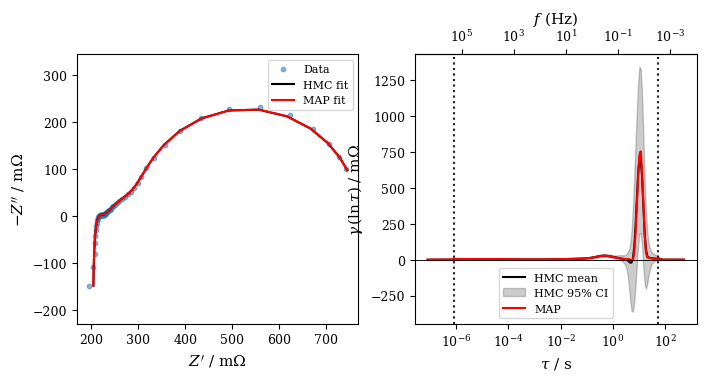

In [6]:
"Visualize DRT and impedance fit"
# plot impedance fit and recovered DRT
fig,axes = plt.subplots(1, 2, figsize=(10 6))

# plot fits of impedance data
inv_hmc.plot_fit(axes=axes[0], plot_type='nyquist', color='k', label='HMC fit', data_label='Data')
inv_map.plot_fit(axes=axes[0], plot_type='nyquist', color='r', label='MAP fit', plot_data=False)

# plot true DRT
#p = axes[1].plot(g_true['tau'],g_true['gamma'],label='True',ls='--')
# add Dirac delta function for RC element
#axes[1].plot([np.exp(-2),np.exp(-2)],[0,10],ls='--',c=p[0].get_color(),lw=1)

# Plot recovered DRT at given tau values
#tau_plot = g_true['tau'].values
inv_hmc.plot_distribution(ax=axes[1], color='k', label='HMC mean', ci_label='HMC 95% CI')
inv_map.plot_distribution(ax=axes[1], color='r', label='MAP')

#axes[1].set_ylim(0,3.5)
axes[1].legend()

C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\bayes_drt2\plotting.py:589: RuntimeWarning: divide by zero encountered in divide
  return 1 / (2 * np.pi * x)


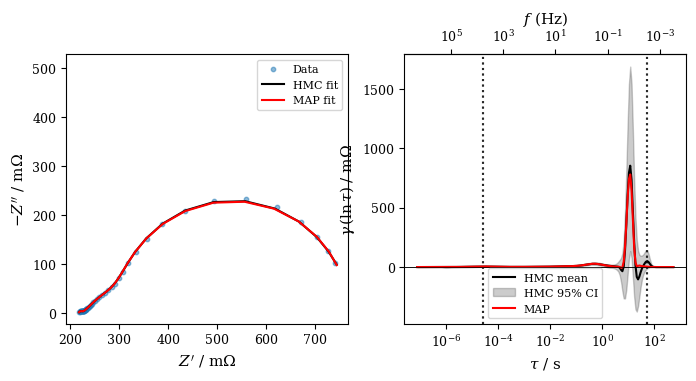

In [7]:
"Visualize Clean DRT and impedance fit"
# plot impedance fit and recovered DRT
fig,axes = plt.subplots(1, 2, figsize=(10, 6))

# plot fits of impedance data
inv_hmcclean.plot_fit(axes=axes[0], plot_type='nyquist', color='k', label='HMC fit', data_label='Data')
inv_mapclean.plot_fit(axes=axes[0], plot_type='nyquist', color='r', label='MAP fit', plot_data=False)

# plot true DRT
#p = axes[1].plot(g_true['tau'],g_true['gamma'],label='True',ls='--')
# add Dirac delta function for RC element
#axes[1].plot([np.exp(-2),np.exp(-2)],[0,10],ls='--',c=p[0].get_color(),lw=1)

# Plot recovered DRT at given tau values
#tau_plot = g_true['tau'].values
inv_hmcclean.plot_distribution(ax=axes[1], color='k', label='HMC mean', ci_label='HMC 95% CI')
inv_mapclean.plot_distribution(ax=axes[1], color='r', label='MAP')

#axes[1].set_ylim(-1,10)
axes[1].legend()

Check statistics, repeat measurement, check stability

In [1]:
"DDT"
#invmapcleanddt = Inverter(

In [17]:
!yadg process RDEyaml.yml Data/RDE/output.nc

Traceback (most recent call last):
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\Scripts\yadg.exe\__main__.py", line 7, in <module>
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\yadg\main.py", line 201, in run_with_arguments
    args.func(args)
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\yadg\subcommands.py", line 72, in process
    datagram = core.process_schema(ds, strict_merge=not args.ignore_merge_errors)
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\yadg\core\__init__.py", line 107, in process_schema
    fvals = handler(
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\yadg\parsers\electrochem\__init__.py", line 83, in process
    return eclabmpr.pro

In [37]:
!deareis



Traceback (most recent call last):
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\deareis\signals.py", line 179, in emit
    func(*args, **kwargs)
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\deareis\program\drt.py", line 107, in perform_drt
    drt: DRTResult = api.calculate_drt(
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\deareis\api\drt.py", line 76, in calculate_drt
    result: _pyimpspec.DRTResult = _pyimpspec.calculate_drt(
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\pyimpspec\analysis\drt\__init__.py", line 91, in calculate_drt
    return {
  File "C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\pyimpspec\analysis\drt\tr_rbf.py", line 1775, in calculate_drt_tr_rbf
    raise DRTError("Failed to perform calculations! Try tweaking the settings.")
pyimpspec.exceptions.DRTError: Failed to perform calculations! Try tweaking the settings.



C:\Users\Houlberg\anaconda3\envs\Thesis\lib\site-packages\pyimpspec\analysis\drt\tr_rbf.py:594: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, -50, 50, epsabs=1e-9, epsrel=1e-9)[0]
